In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Tips
https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [104]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Total bills

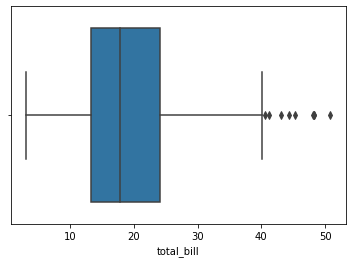

In [105]:
ax = sns.boxplot(x=tips["total_bill"]);

# Draw a vertical boxplot grouped by a categorical variable:

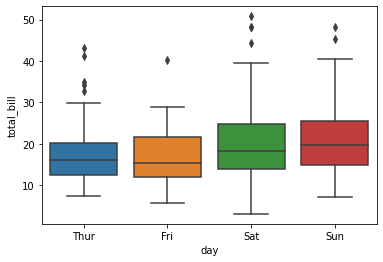

In [106]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

# Draw a boxplot with nested grouping by two categorical variables:

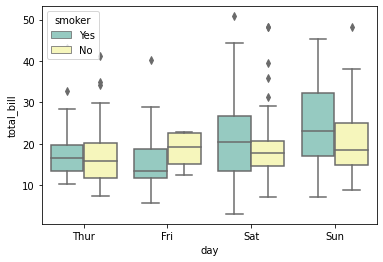

In [107]:
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
                 data=tips, palette="Set3")

# Draw a boxplot with nested grouping when some bins are empty:

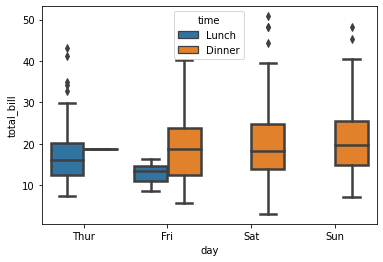

In [108]:
ax = sns.boxplot(x="day", y="total_bill", hue="time",
                 data=tips, linewidth=2.5)


# Control box order by passing an explicit order:¶

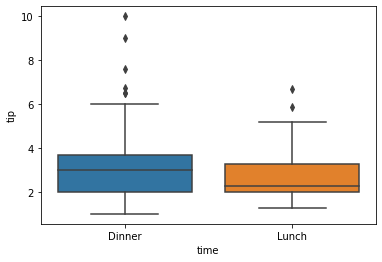

In [109]:
ax = sns.boxplot(x="time", y="tip", data=tips,
                 order=["Dinner", "Lunch"])

# Use hue without changing box position or width:


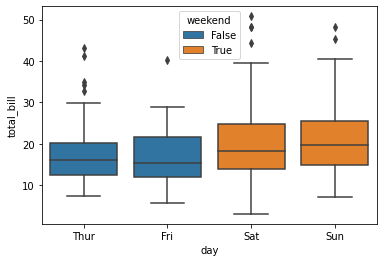

In [111]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
ax = sns.boxplot(x="day", y="total_bill", hue="weekend",
                 data=tips, dodge=False)

# Use swarmplot( ) to show the datapoints on top of the boxes:

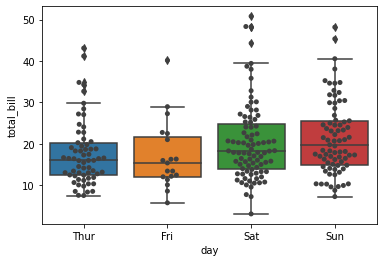

In [112]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)
ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

# Use catplot() to combine a boxplot() and a FacetGrid. This allows grouping within additional categorical variables. Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets:

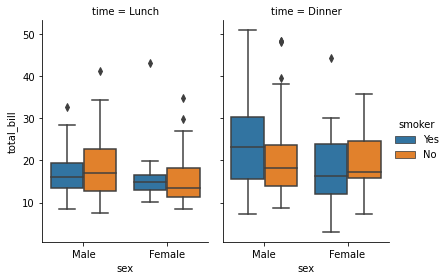

In [113]:
g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="box",
                height=4, aspect=.7);

# Draw a set of vertical bar plots grouped by a categorical variable

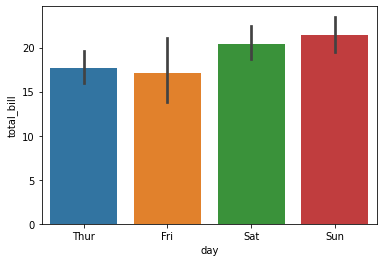

In [114]:
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

# Draw a set of vertical bars with nested grouping by a two variables:

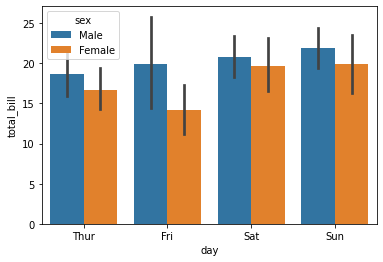

In [115]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

# Draw a set of horizontal bars:

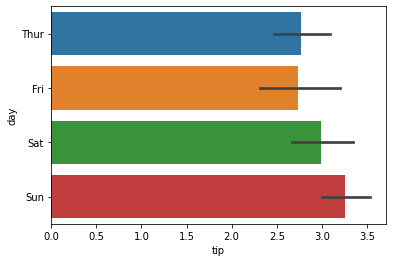

In [116]:
ax = sns.barplot(x="tip", y="day", data=tips)


# Control bar order by passing an explicit order:

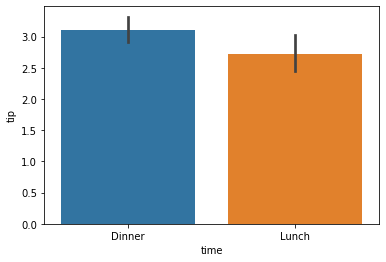

In [117]:
ax = sns.barplot(x="time", y="tip", data=tips,
                 order=["Dinner", "Lunch"])

# Use median as the estimate of central tendency:

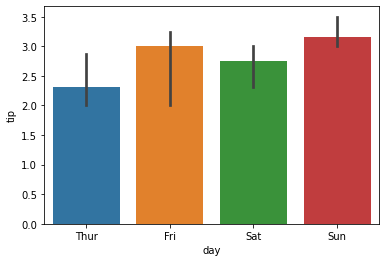

In [118]:
from numpy import median
ax = sns.barplot(x="day", y="tip", data=tips, estimator=median)

# Show the standard error of the mean with the error bars:

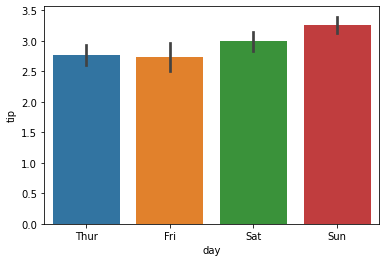

In [119]:
ax = sns.barplot(x="day", y="tip", data=tips, ci=68)

# Show standard deviation of observations instead of a confidence interval:

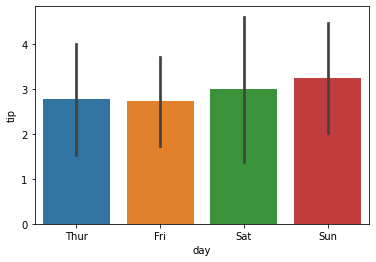

In [120]:
ax = sns.barplot(x="day", y="tip", data=tips, ci="sd")

# Add “caps” to the error bars:

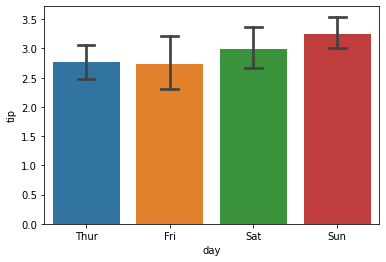

In [121]:
ax = sns.barplot(x="day", y="tip", data=tips, capsize=.2)

# Use a different color palette for the bars:

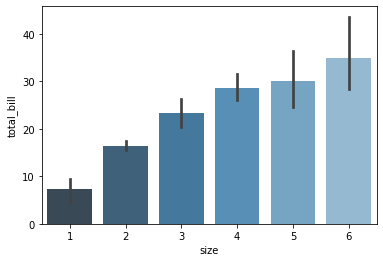

In [122]:
ax = sns.barplot(x="size", y="total_bill", data=tips,
                 palette="Blues_d")

# Use hue without changing bar position or width:


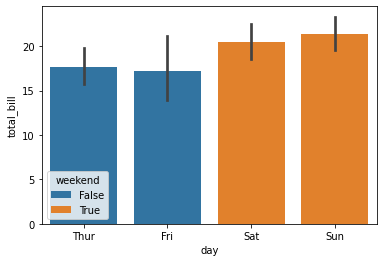

In [123]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
ax = sns.barplot(x="day", y="total_bill", hue="weekend",
                 data=tips, dodge=False)

# Plot all bars in a single color:

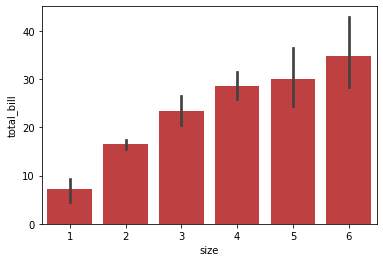

In [124]:
ax = sns.barplot(x="size", y="total_bill", data=tips,
                 color="red", saturation=.5)

# Use matplotlib.axes.Axes.bar() parameters to control the style.

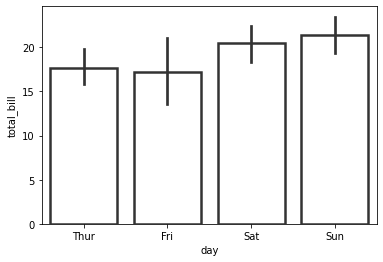

In [125]:
ax = sns.barplot(x="day", y="total_bill", data=tips,
                 linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")


# Use catplot() to combine a barplot() and a FacetGrid. This allows grouping within additional categorical variables. Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets:¶


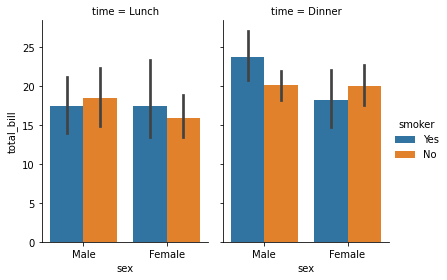

In [126]:
g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="bar",
                height=4, aspect=.7);

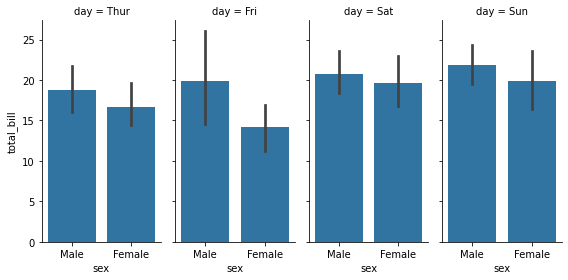

In [128]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"]);

# Draw a boxplot for each numeric variable in a DataFrame:

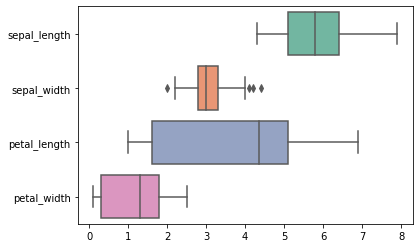

In [110]:
iris = sns.load_dataset("iris")
ax = sns.boxplot(data=iris, orient="h", palette="Set2")

# Causes of Death

In [7]:
import os

In [170]:
df = pd.read_csv('../../../data/causes_of_death.tsv', delimiter = '\t')
df.head()

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339,1236.0
3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921,616.2
4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366,448.0


# Let's look at Gender column

In [71]:
df['Gender'].value_counts(normalize=True)

Male      0.5113
Female    0.4887
Name: Gender, dtype: float64

+ %51% are Male and 48% are female

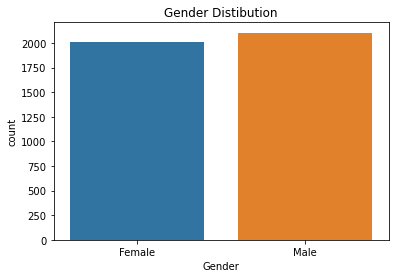

In [74]:
# Plot for the above
sns.countplot(df['Gender'])
fig = plt.gcf()
plt.title('Gender Distibution')
plt.show()

# Plot the above distribution with a Pie Chart

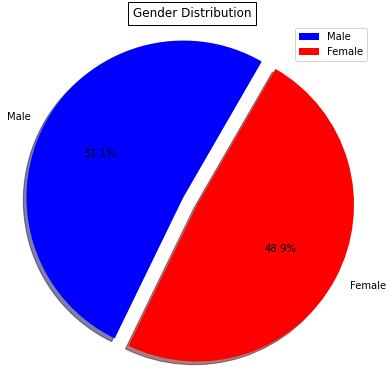

In [72]:

gen_val = ["Male","Female"]
gender = df["Gender"].value_counts()

gender = gender.astype(float)
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes((0,0,0.5,1))
ax.set_title("Gender Distribution" , bbox = {"facecolor":"white" , "pad":5})
labels = "Male" , "Female"
colors = ["blue" , "red"]
explode = (0.1, 0)
plt.pie(gender, explode=explode, labels=labels , colors=colors , 
        autopct = "%1.1f%%" , shadow= True,startangle=60)
plt.legend(labels = gen_val)
plt.axis("equal")
plt.show()

## Let's have a look at our States

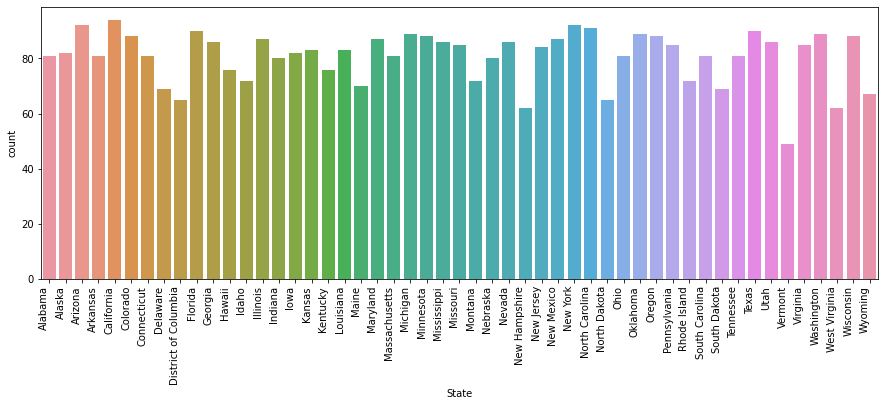

In [73]:
plt.subplots(figsize=(15,5))
s=sns.countplot(df.State)
s.set_xticklabels(s.get_xticklabels(),rotation=90,horizontalalignment='right')
plt.show()

### 1) Create a bar chart of the total number of deaths by state.
* Sort your columns in order (ascending or descending are both acceptable).  
* Also make sure to include a title, axes labels and have your graph be an appropriate size.

**_NOTE:_** In order to do this, slice the `Deaths` column after the `.groupby()` method, but before the `sum()` method.  You can even chain the `.plot()` call on after the `sum()` call and do this all on one line, excluding the labeling of the graph!

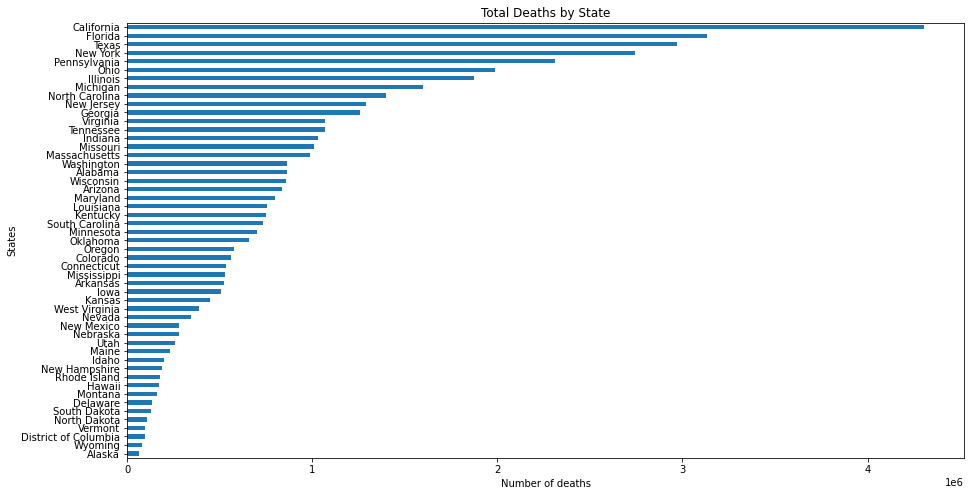

In [56]:
df.groupby(['State'])['Deaths'].sum().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Total Deaths by State')
plt.xlabel('Number of deaths')
plt.ylabel('States')
plt.show()

### 2) Complete the Bar Chart

Now that we've reformatted our data, let's create a bar chart of the Mean Population by State.

In [60]:
df['Population'].dtypes

dtype('O')

In [62]:
to_drop = df[df['Population'] == 'Not Applicable']
df.drop(to_drop.index, axis=0 , inplace=True)

In [63]:
# Let's convert population to integers as its an object at this moment
df['Population'] = df['Population'].map(lambda x: int(x))

Text(0, 0.5, 'States')

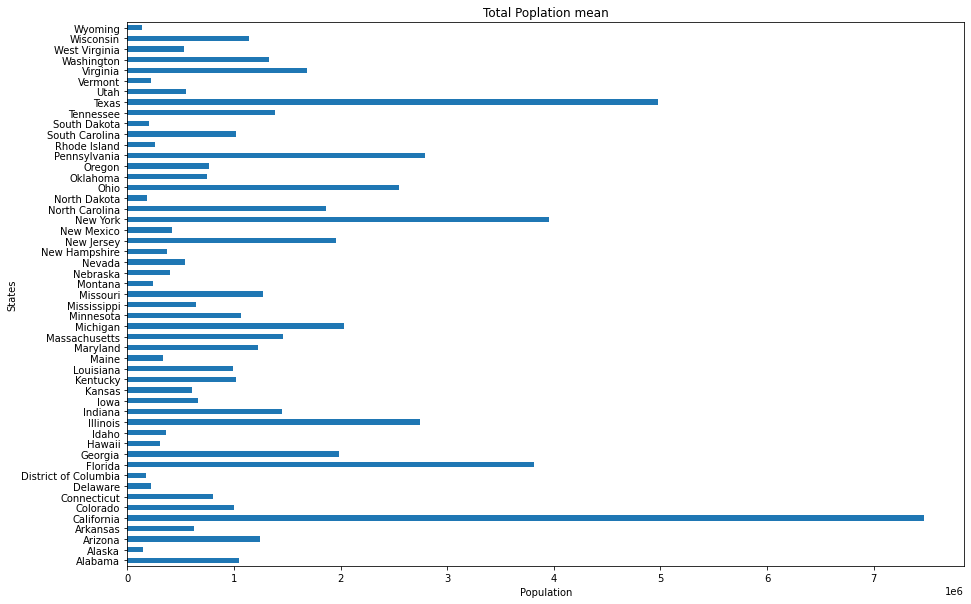

In [64]:
df.groupby(['State'])['Population'].mean().plot(kind='barh', figsize=(15,10))
plt.title('Total Poplation mean')
plt.xlabel('Population')
plt.ylabel('States')

## Kiva Loans Data

In [76]:
# Load in kiva_loans.csv as df
data = pd.read_csv("../../data/kiva_loans.csv")
data.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


# Load in the themes data as themes

In [78]:
themes = "../../data/loan_theme_ids.csv"
themes

'../../data/loan_theme_ids.csv'

In [80]:
themes = pd.read_csv('../../data/loan_theme_ids.csv')
themes.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


# Merge the themes file with the data file

In [82]:
merger = pd.merge(data, themes, on='id')
merger.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,Loan Theme ID,Loan Theme Type,Partner ID
0,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,a1050000000sjEC,Underserved,247.0
1,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,a1050000002VkWz,Underserved,334.0
2,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,a1050000000sjEC,Underserved,247.0


# Let's Look at the countires in the dataframe

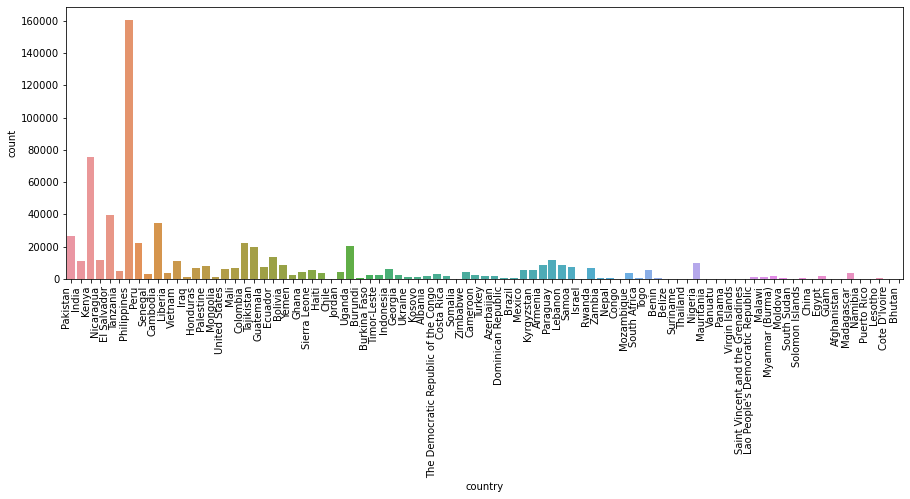

In [87]:
plt.subplots(figsize=(15,5))
s=sns.countplot(merger.country)
s.set_xticklabels(s.get_xticklabels(),rotation=90,horizontalalignment='right')
plt.show()

# Let's Choose USA as the country we want to look at

In [88]:
df_usa = merger[merger['country'] == 'United States']

# Show the counts of observations in each categorical bin using bars.

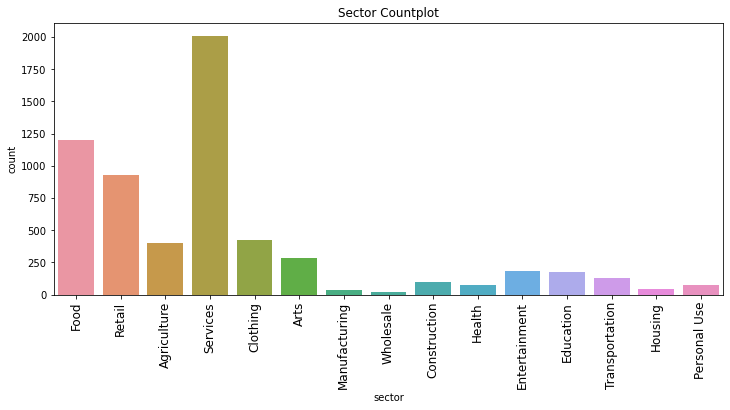

In [89]:
plt.figure(figsize=(12,5)) # Create a new figure
plt.title('Sector Countplot')
plt.xticks(rotation=90,fontsize=12)
sns.countplot(x='sector',data= df_usa)
plt.show()

# Violin plot

 + A violinplot shows the distribution of quantitative data across several 
 levels of one categorical variables such that those distributions can be compared

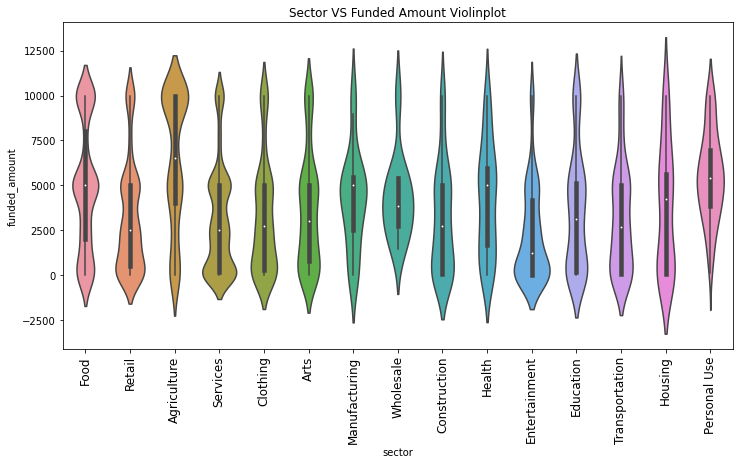

In [90]:
plt.figure(figsize=(12,6)) # Create a new figure
plt.title('Sector VS Funded Amount Violinplot')
plt.xticks(rotation=90,fontsize=12)
sns.violinplot(x='sector',y='funded_amount',data=df_usa);

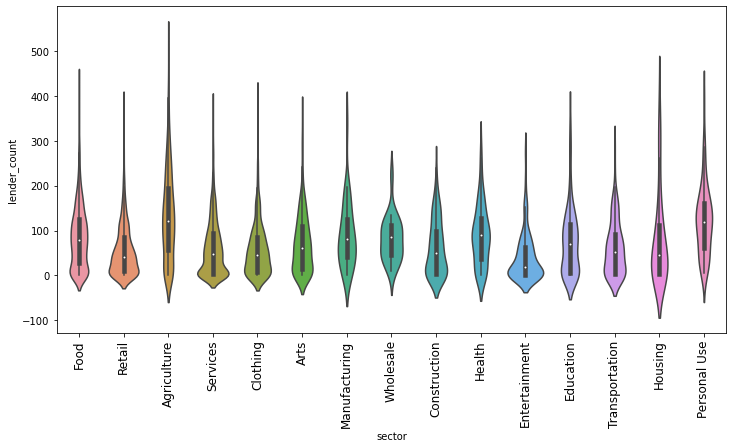

In [92]:
plt.figure(figsize=(12,6)) # Create a new figure
plt.xticks(rotation=90,fontsize=12)
sns.violinplot(x='sector',y='lender_count',data=df_usa);

# Boxplot

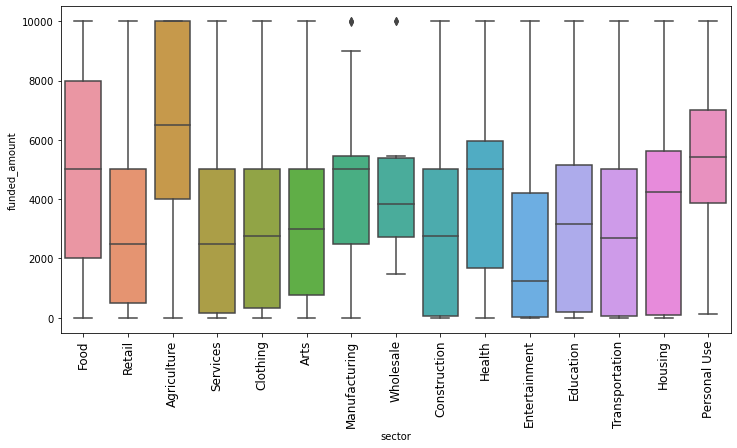

In [93]:
# Distribution of funded amount within sectors
plt.figure(figsize=(12,6)) # Create a new figure
plt.xticks(rotation=90,fontsize=12)
sns.boxplot(x="sector", y="funded_amount", data=df_usa);

In [ ]:
# Top Regions with the highest amount of loans

Top Cities 15 with the highest amount of loans


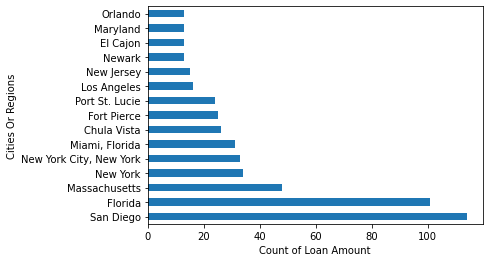

In [99]:
df_usa['region'].value_counts().head(15).plot(kind='barh')
plt.xlabel('Count of Loan Amount')
plt.ylabel('Cities Or Regions')
print("Top Cities 15 with the highest amount of loans")

# We can improve on the above this way

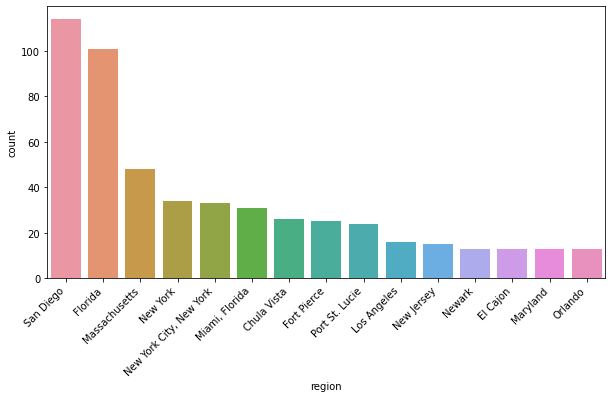

In [102]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(x= "region" ,data = df_usa, 
              order = df_usa['region'].value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.show()

# Chocolate Flavours

In [130]:
path = '../../../data/flavors_of_cacao.csv'  # this is the location of my data in my directory
data = pd.read_csv(path)
data.head()

col_names = ["Company",
"Bean_Origin",
"REF",
"Review_Date",
"Cocoa_Percent",
"Company_Location",
"Rating",
"Bean_Type",
"Broad_Bean_Origin"]

choco_data = pd.read_csv(path , names = col_names , header=0)
choco_data.head()

,Company,Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [131]:
# Check the shape of the DataFrame
print('Chocolate Data - rows:' , choco_data.shape[0],'columns:', choco_data.shape[1])

Chocolate Data - rows: 1795 columns: 9


In [133]:
# Checking missing data
print("There is {} missing values in the dataframe".format(choco_data.isnull().sum().sum()))

There is 2 missing values in the dataframe


In [134]:
choco_data.dropna(inplace=True)

# Top 15 Cocoa companies

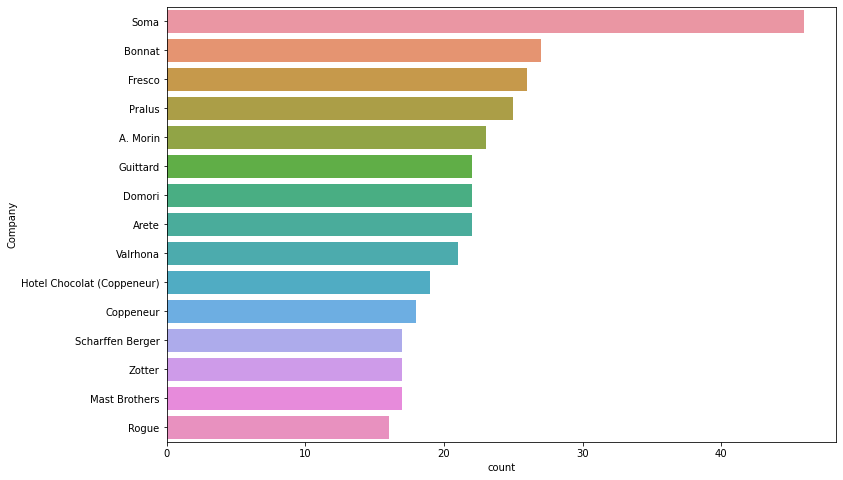

In [136]:
plt.figure(figsize = (12, 8))
sns.countplot(y= "Company", data = choco_data, order = choco_data['Company'].value_counts().iloc[:15].index)
plt.show()

In [137]:
choco_data.Company.nunique()

416

+ Observation :

There are 416 Companies in total in our data and the above viz shows the top 15

# Top 15 Cocoa Bean Origin

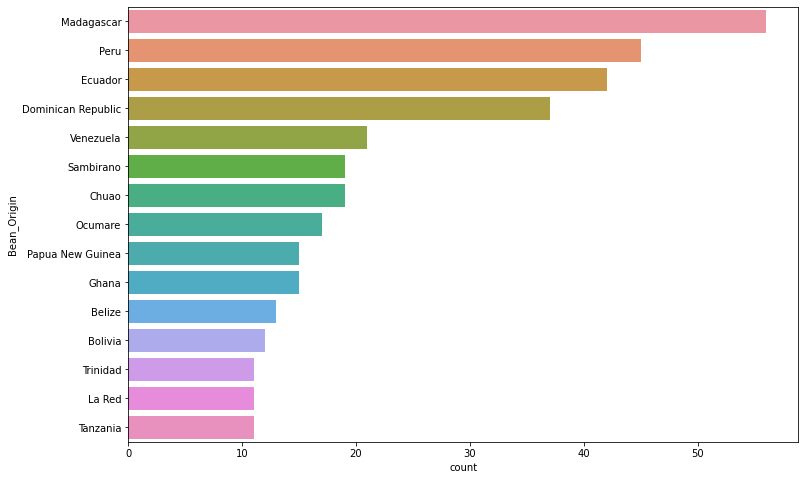

In [138]:
plt.figure(figsize = (12, 8))
sns.countplot(y= "Bean_Origin", data=choco_data, order=choco_data['Bean_Origin'].value_counts().iloc[:15].index)
plt.show()

# Top 15 Bean Types

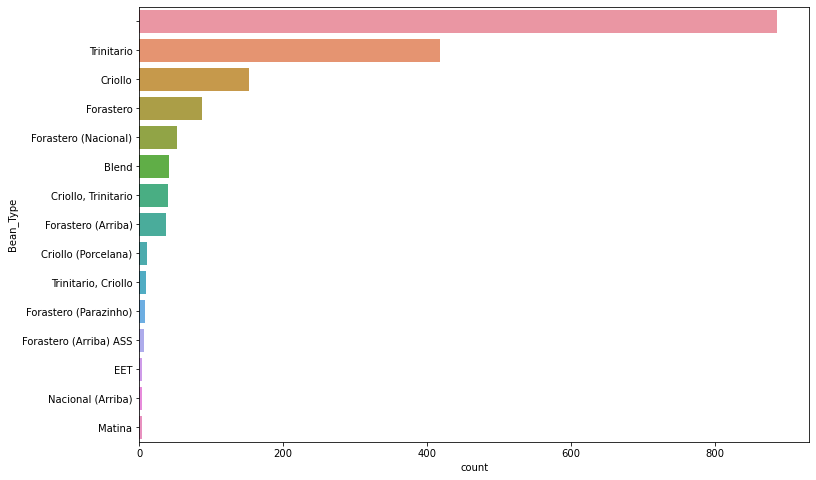

In [139]:
plt.figure(figsize = (12, 8))
sns.countplot(y= "Bean_Type", data = choco_data, order = choco_data['Bean_Type'].value_counts().iloc[:15].index)
plt.show()

# Count of Broad Beans Origin on their total working years

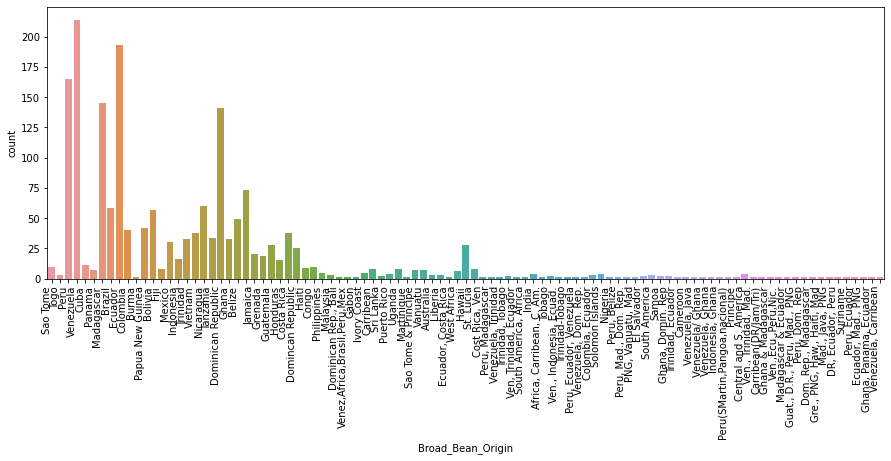

In [140]:
plt.subplots(figsize=(15,5))
s=sns.countplot(choco_data.Broad_Bean_Origin)
s.set_xticklabels(s.get_xticklabels(),rotation=90,horizontalalignment='right')
plt.show()

# What is given by the chocolate rating?
The dataset description says...

+ Unpleasant (Mostly unpalatable)
+ Disappointing
+ Satisfactory (3) to praiseworthy (3.5)
+ Premium
+ Elite

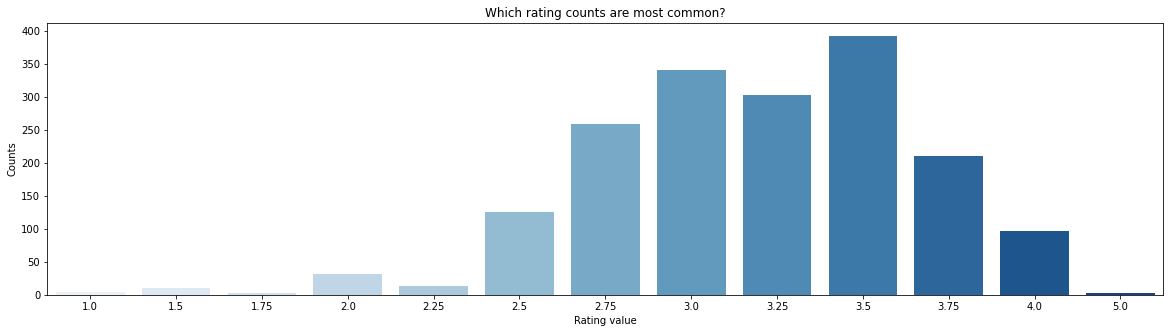

In [141]:
rating_counts = choco_data.Rating.value_counts()

plt.figure(figsize=(20,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Blues")
plt.xlabel("Rating value")
plt.ylabel("Counts")
plt.title("Which rating counts are most common?");

# Create a Pie Chart to show Chocolate ratings

In [142]:
satisfactory = choco_data[(choco_data["Rating"] >=3) & (choco_data["Rating"] <4)]
unsatisfactory = choco_data[choco_data["Rating"] <3]
highly_satisfactory = choco_data[choco_data["Rating"] >=4]

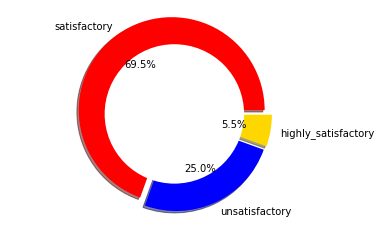

In [143]:
labels = ["satisfactory","unsatisfactory","highly_satisfactory"]
sizes = [len(satisfactory), len(unsatisfactory), len(highly_satisfactory)]
colors = ["red","blue","gold"]
explode = (0.05, 0.05, 0.05)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%" , shadow=True)
centre_circle = plt.Circle((0,0),0.75, fc="white", linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis("equal")
plt.show()

# What bean types do we have?

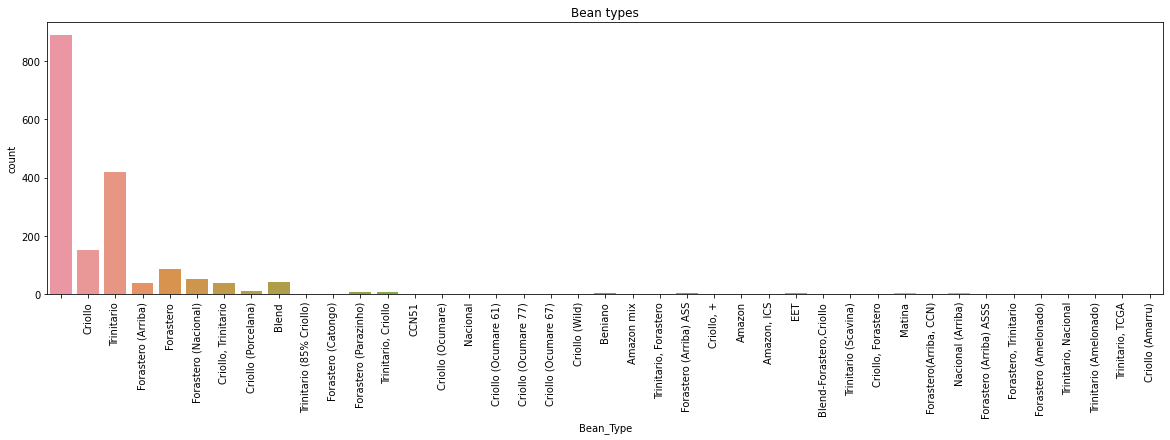

In [144]:
plt.figure(figsize=(20,5))
sns.countplot(choco_data.Bean_Type)
plt.xticks(rotation=90);
plt.title("Bean types");

# HR Employee Attrition Data

In [145]:
hr_df = pd.read_csv("../../../data/HR-Employee-Attrition.csv")
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Heatmap

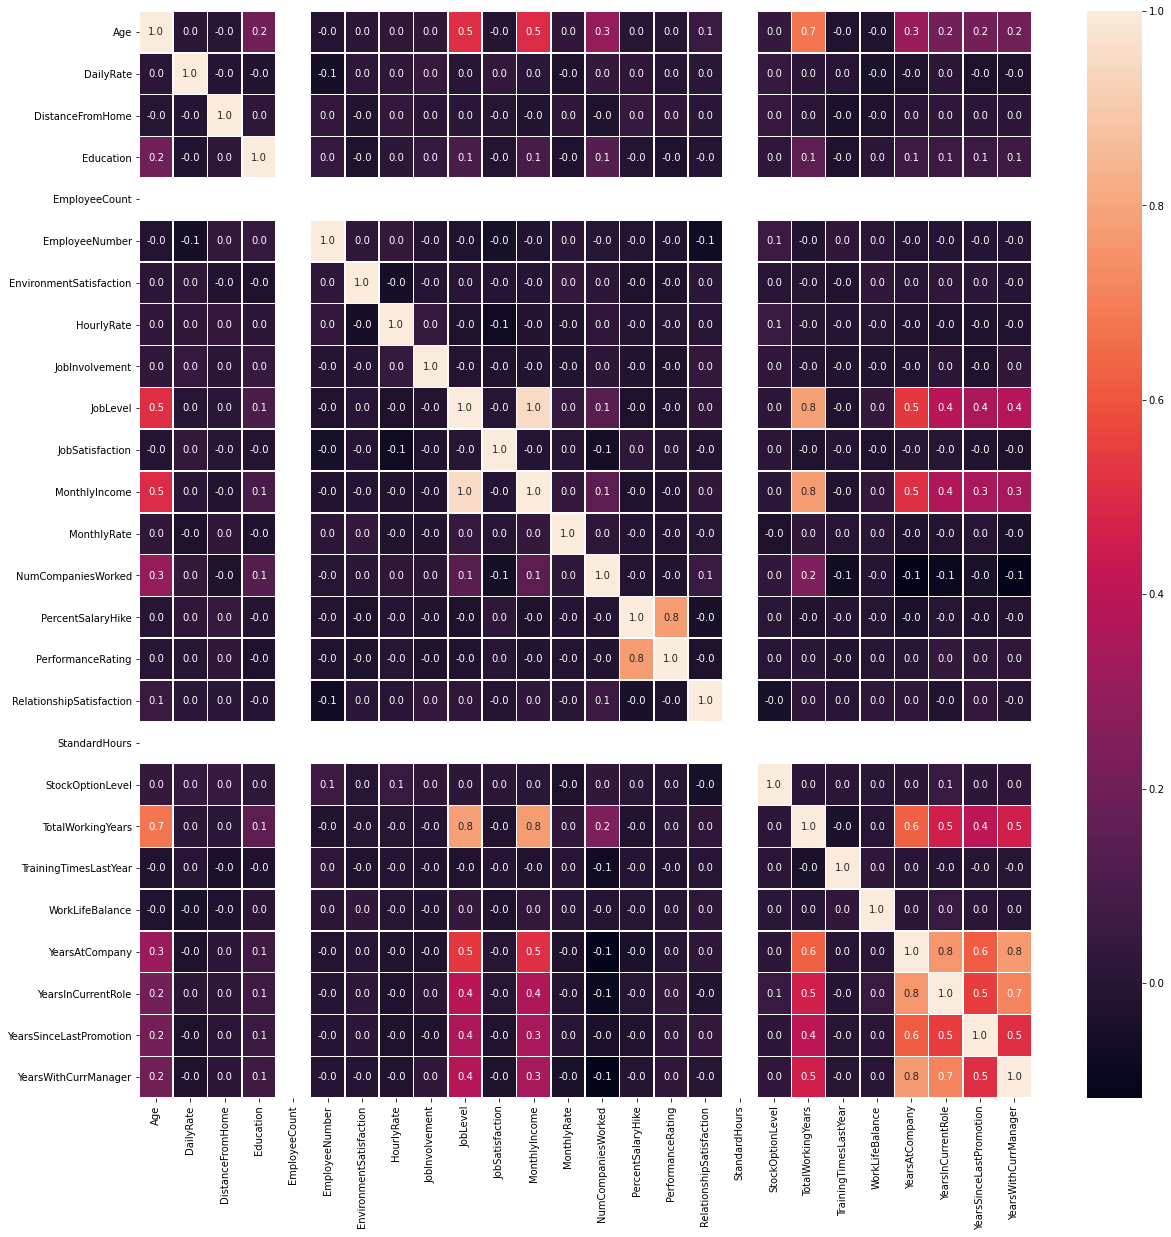

In [147]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(hr_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [ ]:
# count of people doing overtime

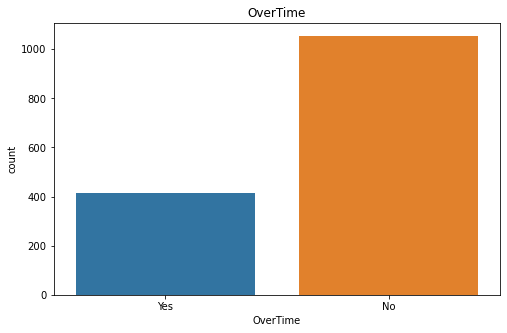

In [149]:
sns.countplot(hr_df['OverTime'])
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.title('OverTime');

# count of people based on their marital status

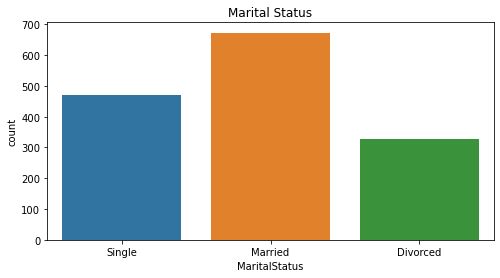

In [151]:
sns.countplot(hr_df['MaritalStatus'])
fig = plt.gcf()
fig.set_size_inches(8,4)
plt.title('Marital Status')
plt.show()

# Count of people based on their Jobrole

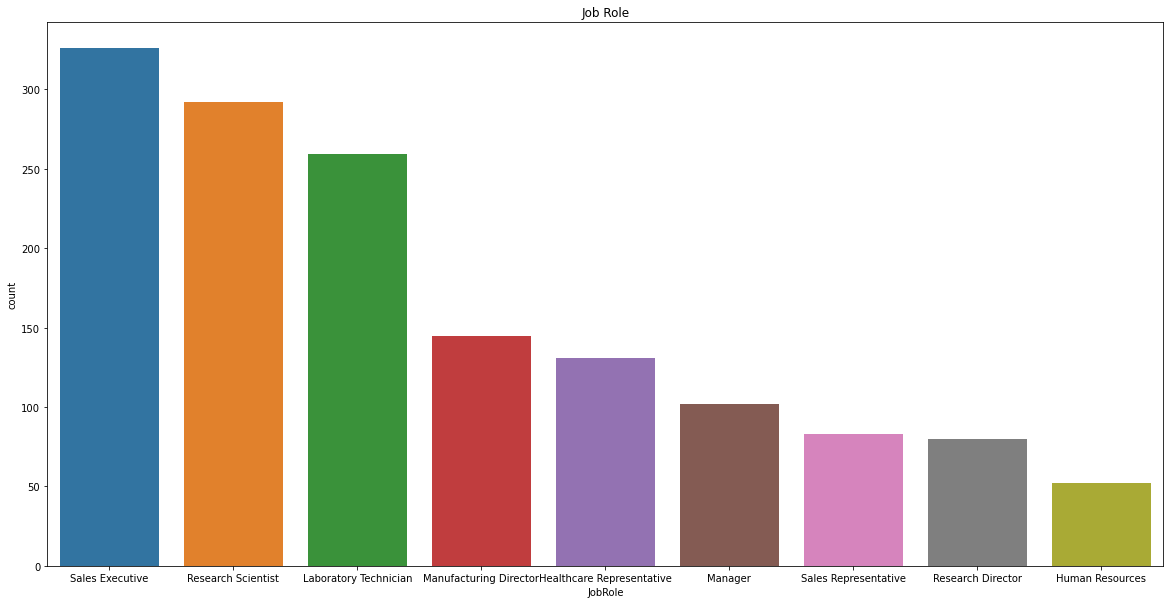

In [154]:
sns.countplot(hr_df['JobRole'])
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Job Role')
plt.show()

# count of people based on their Gender

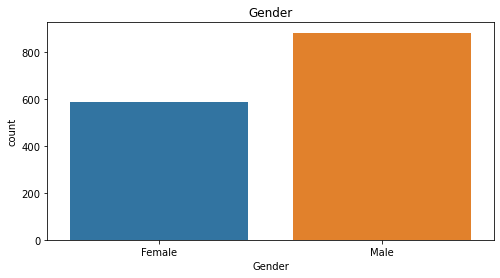

In [156]:
sns.countplot(hr_df['Gender'])
fig = plt.gcf()
fig.set_size_inches(8,4)
plt.title('Gender');

# creating a pie chart for the gender variables

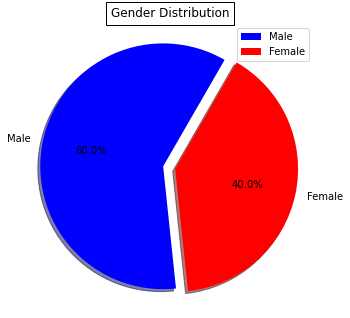

In [157]:
gender_val = ['Male','Female']
gender = hr_df['Gender'].value_counts()

gender = gender.astype(float)
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,0.5,1))
ax.set_title('Gender Distribution' , bbox={'facecolor':'white','pad':5})
labels = 'Male','Female'
colors = ['blue' , 'red']
explode = (0.1 , 0)
plt.pie(gender ,explode =explode ,labels=labels ,colors =colors ,autopct = '%1.1f%%' ,shadow = True,startangle = 60)
plt.legend(labels = gender_val)
plt.axis('equal')
plt.show()

# count of people based on their field of education

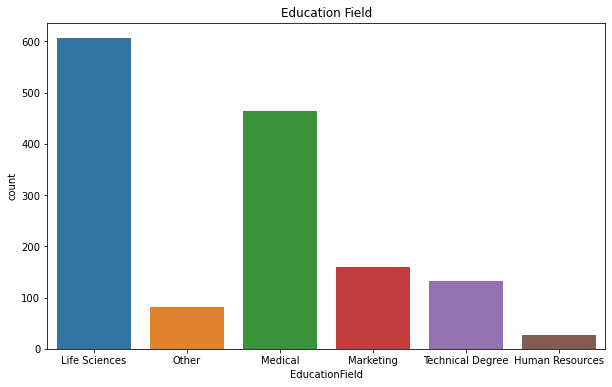

In [159]:
sns.countplot(hr_df['EducationField'])
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Education Field')
plt.show()

# Count of people based on the department in which they work

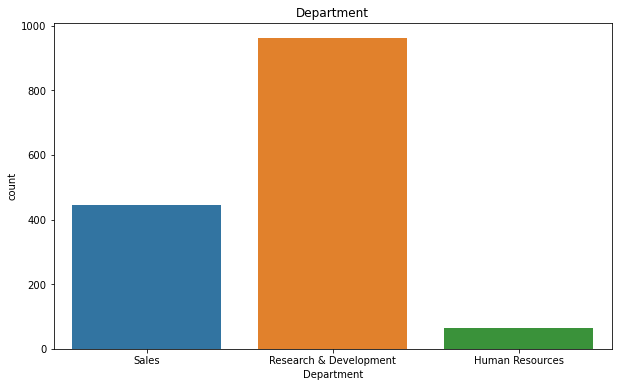

In [160]:
sns.countplot(hr_df['Department'])
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Department')
plt.show()

# Count of people based on their Travel Frequency

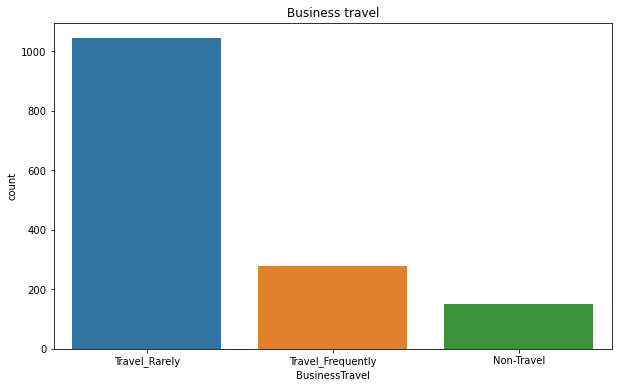

In [162]:
sns.countplot(hr_df['BusinessTravel'])
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Business travel');

# Analyzing the age group of the peole doing overtime

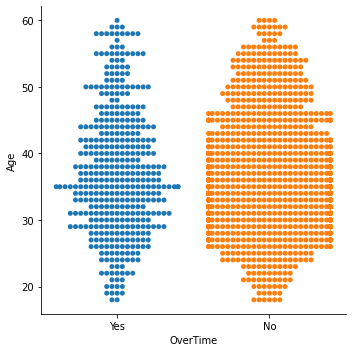

In [163]:
sns.catplot(x="OverTime", y="Age", kind="swarm", data=hr_df);

# Count of people based on their total working years

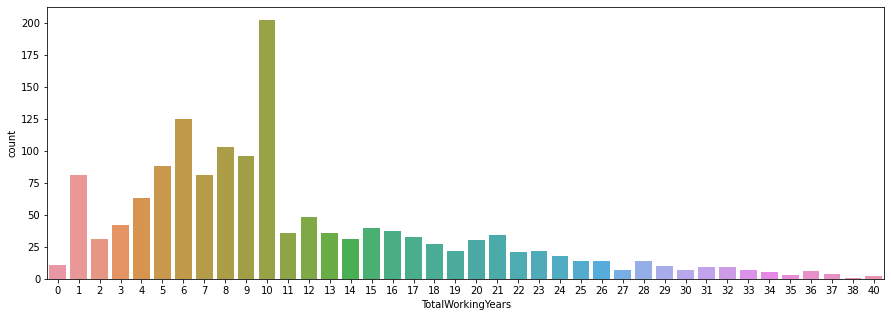

In [165]:
plt.subplots(figsize=(15,5))
sns.countplot(hr_df.TotalWorkingYears)
plt.show()

# Count of people based on their Education

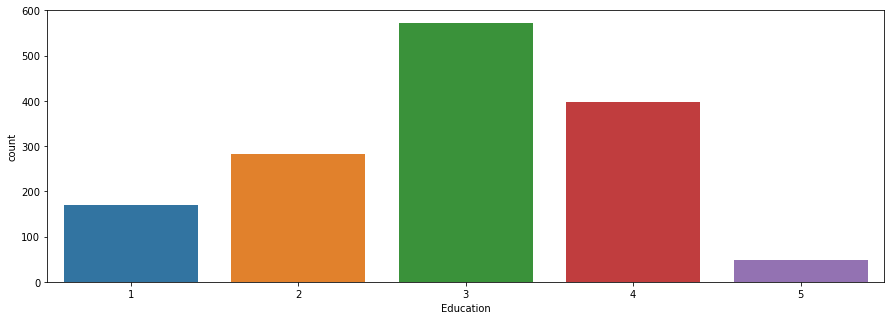

In [166]:
plt.subplots(figsize=(15,5))
sns.countplot(hr_df.Education)
plt.show()

# Count of people based on the number of companies they have worked for

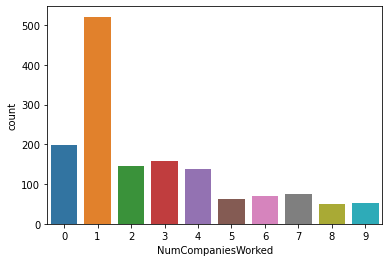

In [167]:
sns.countplot(hr_df.NumCompaniesWorked)
plt.show()

# Count of people based on the distance from home they are working

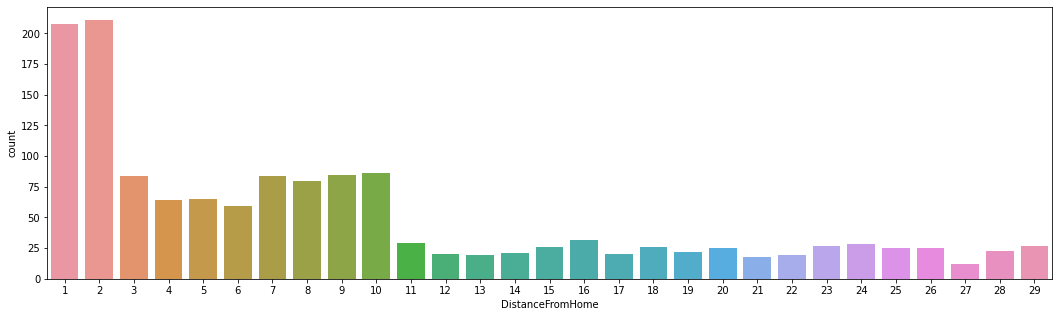

In [168]:
plt.subplots(figsize=(18,5))
sns.countplot(hr_df.DistanceFromHome)
plt.show()